EDA to Typhoon Mitigation and Response Framework (TMRF)

“Experience is a master teacher, even when it’s not our own.”
― Gina Greenlee

The Philippines' apparent vulnerability to natural disasters emerges from its geographic location within the Pacific Ring of Fire. The country is surrounded by large bodies of water and faces the Pacific Ocean, which produces 60% of the world's typhoons. Approximately twenty tropical cyclones pass through the Philippine area of responsibility each year, ten of which are typhoons and five of which are catastrophic (Brown, 2013). Due to a lack of preparedness and response, families in rural areas are more likely to be hit. According to the Weather Underground (n.d.), hurricanes are becoming a global threat as they solidify and more super tropical storms emerge. As a result, every municipality should have a high level of safety and security. However, government agencies and non-governmental organizations in the Philippines promote emergency preparedness, but they have yet to acquire the public's general attention like in Yolanda’s storm surge disaster where there is insufficient public awareness of storm surges, higher casualties have occurred (Commision on Audit, n.d.). The Commission on Audit also reported that the mayor of Tacloban City had stated that more lives may have been saved if storm surges were labeled as tsunami-like in nature. According to the National Research Council et al. (n.d.), preparedness is indeed the way of transforming a community's awareness of potential natural hazards into actions that strengthen its ability to respond to and recover from disasters and proposals for preparedness must address the immediate response and all the longer-term recovery and rehabilitation. 

The objective of this analysis is to construct an Exploratory Data Analysis to Typhoons from the year 2019 that prompted the most casualty rates in the country and data on the municipal governments that had the least number of affected families’ individuals per typhoon in the Philippines. Moreover, a global dataset from 2000-2022 about hurricanes in the U.S. from the Centre for Research on the Epidemiology of Disasters' Emergency Events Database (EM-DAT) will be utilized in the same manner as mentioned in the Philippines Data set to know which Location in the United States had the most successful response and mitigation plan for typhoons. This information will be used to construct a Typhoon Mitigation and Response Plan that may help the Philippines deal with hurricanes. Integrating various programs from other countries will increase the likelihood of Filipinos' survival and recovery from typhoons. 

<pre>
<b>Contents of the Notebook:</b>

   P. Philippines Data set 2019
      p1. Analysis of the features and X variables.
      p2. Importing data from the excel sheet data set to a pandas data frame.
      p3. Selection of X variables to be used for the analysis.
      p4. Data Cleaning
      p5. Correlation Analysis of the featured X variables.
      p6. Data Analysis
          Format for every objectives:  Objective
                                        Codes
                                        Outputs
                                        Analysis and Observation

   a. American Data set 2000-2022
      a1. Analysis of the features and X variables.
      a2. Selection of X variables to be used for the analysis.
      a3. Converting the data from the excel sheet data set to a pandas data frame.
      a4. Dataframe Normalization
      a5. Data Cleaning
      a6. Statistical Overview and Correlation Analysis of the featured X variables.'
      a7. Data Analysis

          Format for every objectives:  Objective
                                        Codes
                                        Outputs
                                        Analysis and Observation
                                        Recommendations
</pre>

Humanitarian Data Exchange Data set about Philippines (2019)

p1. Analysis of the features and X variables.




p2. Importing data from the excel sheet data set to a pandas data frame.

In [61]:

import pandas as pd #Importing the matplotlib library and renaming it as plt.
import numpy as np
import matplotlib.pyplot as plt #Importing pandas library
import seaborn as sns
from matplotlib import cm
from pandas.plotting import scatter_matrix
import plotly.express as px
from IPython.display import display, Markdown

data=pd.read_excel(r'200204_philippines-2019-events-data.xlsx_3FAWSAccessKeyId=AKIAXYC32WNARK756OUG_Expires=1644193427_Signature=hFTPcWroN6S3M2pX40ObWvu24p8=.xlsx', sheet_name="Tropical Cyclones")

df=pd.DataFrame(data) #convert dataset excel into dataframe



p3. Selection of X variables to be used for the analysis.

In [62]:

#selecting all needed and specific columns from original dataframe/dataset and creating new dataframe named new_df
new_df = df.iloc[:,[0,2,4,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23]].copy()

p4. Data Cleaning

In [63]:
new_df.info() # info() function was used to get an understanding of which aspects of the dataset need cleaning.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Region                    686 non-null    object        
 1   Province                  686 non-null    object        
 2   City_Mun                  686 non-null    object        
 3   Year                      687 non-null    int64         
 4   Incident                  687 non-null    object        
 5   Date Occurred             687 non-null    datetime64[ns]
 6   2015 Population           687 non-null    int64         
 7   Affected_FAM              687 non-null    int64         
 8   Affected_PERs             686 non-null    float64       
 9   Inside_EC_Fam_Cum         659 non-null    float64       
 10  Inside_EC_Fam_Now         687 non-null    int64         
 11  Inside_EC_Per_Cum         659 non-null    float64       
 12  Inside_EC_Per_Now     

In [64]:
new_df.isnull().sum() #checking for total null values. The resulted values or rows that had null values will be subjected to cleaning.

Region                       1
Province                     1
City_Mun                     1
Year                         0
Incident                     0
Date Occurred                0
2015 Population              0
Affected_FAM                 0
Affected_PERs                1
Inside_EC_Fam_Cum           28
Inside_EC_Fam_Now            0
Inside_EC_Per_Cum           28
Inside_EC_Per_Now            1
Outside_EC_Fam_Cum          28
Outside_EC_Fam_Now          28
Outside_EC_Pers_Cum         28
Outside_EC_Per_Now           0
Totally_damaged_houses       0
Partially_damaged_houses     1
IDP_Cum                      0
dtype: int64

In [65]:
#To clean the dataframe and remove the object data string columns (Region, Province, City Mun) which had three null values, dropna() function was used.

new_df = new_df.dropna(subset=['Region', 'Province', 'City_Mun'])

In [66]:
# After dropping all null values of object string data types, isnull() function were again used to check if the null row(s) was dropped. As the table display below, all object string null rows were removed. However, there are still null values for the int data types columns on the dataframe. This null values are also subjected for cleaning.
new_df.isnull().sum() #checking for total null values

Region                       0
Province                     0
City_Mun                     0
Year                         0
Incident                     0
Date Occurred                0
2015 Population              0
Affected_FAM                 0
Affected_PERs                1
Inside_EC_Fam_Cum           28
Inside_EC_Fam_Now            0
Inside_EC_Per_Cum           28
Inside_EC_Per_Now            1
Outside_EC_Fam_Cum          28
Outside_EC_Fam_Now          28
Outside_EC_Pers_Cum         28
Outside_EC_Per_Now           0
Totally_damaged_houses       0
Partially_damaged_houses     1
IDP_Cum                      0
dtype: int64

In [67]:
# From the results above, there are a number of int data type null values that need to be cleaned. And pandas can only clean the dataframe if all rows has values specially for integers. All object data types are already have no null values, which they are all strings. Thus, fillna() function was used to replace null values to zero for smooth data analysis.
new_df = new_df.fillna(0) # replace NaN with zero value

In [68]:
new_df.isnull().sum() #checking for total null values

#After all of these data cleaning processes, the final dataframe for analysis were created and named  as "new_df". And from the results below of isnull() function from the new dataframe, there are now no null values from within the data frame. Thus, data analysis would be smooth and no errors can occur on the latter part of this EDA.

Region                      0
Province                    0
City_Mun                    0
Year                        0
Incident                    0
Date Occurred               0
2015 Population             0
Affected_FAM                0
Affected_PERs               0
Inside_EC_Fam_Cum           0
Inside_EC_Fam_Now           0
Inside_EC_Per_Cum           0
Inside_EC_Per_Now           0
Outside_EC_Fam_Cum          0
Outside_EC_Fam_Now          0
Outside_EC_Pers_Cum         0
Outside_EC_Per_Now          0
Totally_damaged_houses      0
Partially_damaged_houses    0
IDP_Cum                     0
dtype: int64

p5. Correlation Analysis of the featured X variables.

p6. Data Analysis

A. Determine the top 5 typhoons from 2019 that brought the greatest and least number of infrastructure casualties to the Provinces in the Philippines based from Totally Damaged Houses x variable. 

,Totally_damaged_houses
Incident,
TY Tisoy,68104
TY Ursula,60483
TS Quiel,59
TS Hanna,56
TD Marilyn,44


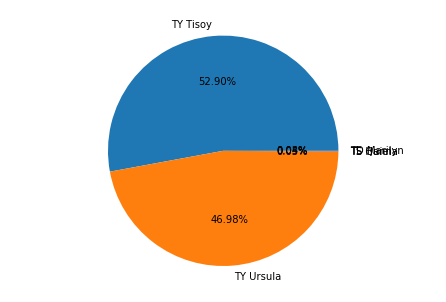

In [69]:
cyclone=new_df.groupby("Incident")
dhouse=cyclone["Totally_damaged_houses"].sum()
typ=pd.DataFrame(dhouse)

cycph=typ.sort_values(by="Totally_damaged_houses", ascending=False)
tdh=cycph.head(5)
display(tdh)

#graphing of data
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
storms = ['TY Tisoy', 'TY Ursula', 'TS Quiel', 'TS Hanna', 'TD Marilyn']
damages = [68104,60483,59,56,44]
ax.pie(damages, labels = storms,autopct='%1.2f%%')
plt.show()

B. Acquire the data about the Provinces who had the greatest and least number of affected individuals per typhoon (Affected_Pers). 

,Affected_PERs
Province,
LEYTE,772162.0
CAPIZ,622951.0
Northern Samar,602234.0
AKLAN,504447.0
SAMAR (WESTERN SAMAR),483308.0


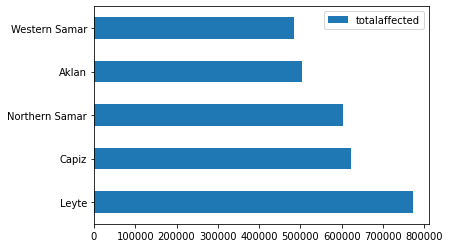

In [70]:
#top 5 typhoons from 2019 that brought the greatest number of infrastructure casualties to the Provinces in the Philippines 
ByProvince= new_df.groupby('Province')
TotalData = ByProvince['Affected_PERs'].sum()
data= pd.DataFrame(TotalData)
SortedData= data.sort_values(by='Affected_PERs',ascending=False)
result= SortedData.head(5)
display(result)

#data graphing 
totalaffected = [772162, 622951, 602234, 504447, 483308]
index = ['Leyte', 'Capiz', 'Northern Samar',
         'Aklan', 'Western Samar']
df = pd.DataFrame({'totalaffected': totalaffected,
                   'Province': index}, index=index)
ax = df.plot.barh(y='totalaffected')

C. Get the information that shows the top 5 municipalities who were most and least affected by typhoons from the year 2019 based from the Affected_PERs x variable.  

,Affected_PERs
City_Mun,
CITY OF ROXAS (CAPITAL),168580.0
Daraga (Locsin),126595.0
CITY OF CATBALOGAN (CAPITAL),122572.0
CITY OF TACLOBAN (CAPITAL),119918.0
Catarman (capital),106424.0


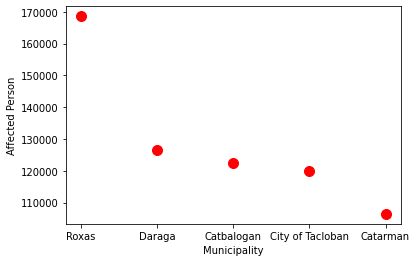

In [71]:
ByMuni= new_df.groupby('City_Mun')
TotalData=ByMuni['Affected_PERs'].sum()
data = pd.DataFrame(TotalData)
SortedData = data.sort_values(by='Affected_PERs',ascending=False)
result= SortedData.head(5)
display(result)

data={'Municipality':['Roxas', 'Daraga', 'Catbalogan',
'City of Tacloban', 'Catarman'],
      'Affected Person':[ 168580, 126595, 122572, 119918, 106424]}
  
# Load data into DataFrame
df = pd.DataFrame(data = data);
  
#Graphing of Data
df.plot.scatter(x = 'Municipality', y = 'Affected Person', s = 100, c = 'red');


In [72]:
PhilData = new_df
PhilData

,Region,Province,City_Mun,Year,Incident,Date Occurred,2015 Population,Affected_FAM,Affected_PERs,Inside_EC_Fam_Cum,Inside_EC_Fam_Now,Inside_EC_Per_Cum,Inside_EC_Per_Now,Outside_EC_Fam_Cum,Outside_EC_Fam_Now,Outside_EC_Pers_Cum,Outside_EC_Per_Now,Totally_damaged_houses,Partially_damaged_houses,IDP_Cum
0,Region XIII (CARAGA),Agusan del Norte,City of Butuan (capital),2019,TD Amang,2019-01-19,337063,269,1383.0,269.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
1,Region XIII (CARAGA),Agusan del Norte,Jabonga,2019,TD Amang,2019-01-19,23184,14,59.0,14.0,0,59.0,0.0,0.0,0.0,0.0,0,0,0.0,59
2,Region XIII (CARAGA),Agusan del Sur,La Paz,2019,TD Amang,2019-01-19,28217,1386,6930.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
3,Region XIII (CARAGA),Agusan del Sur,Talacogon,2019,TD Amang,2019-01-19,38374,777,3414.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0
4,Region XIII (CARAGA),Dinagat Islands,Basilisa (Rizal),2019,TD Amang,2019-01-19,36880,75,266.0,75.0,0,266.0,0.0,0.0,0.0,0.0,0,0,0.0,266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,REGION VII (CENTRAL VISAYAS),CEBU,MADRIDEJOS,2019,TY Ursula,2019-12-23,36429,1869,9345.0,0.0,0,0.0,0.0,96.0,96.0,480.0,480,0,0.0,480
683,REGION VII (CENTRAL VISAYAS),CEBU,MEDELLIN,2019,TY Ursula,2019-12-23,55332,6653,33265.0,0.0,0,0.0,0.0,111.0,111.0,555.0,555,92,2361.0,555
684,REGION VII (CENTRAL VISAYAS),CEBU,SAN REMIGIO,2019,TY Ursula,2019-12-23,57557,6,30.0,0.0,0,0.0,0.0,3.0,3.0,15.0,15,0,0.0,15
685,REGION VII (CENTRAL VISAYAS),CEBU,SANTA FE,2019,TY Ursula,2019-12-23,28603,2809,14045.0,0.0,0,0.0,0.0,176.0,176.0,880.0,880,0,0.0,880


The Centre for Research on the Epidemiology of Disasters' Data set about the American Typhoons (2000-2022)
  

a1. Analysis of the features and X variables.

In [73]:
# casualties of storms in America based in EMDAT datasets
data = pd.read_excel(r'2000-2022-emdat_public_2022_04_24_query_uid-XuKaJG.xlsx', sheet_name="emdat data")
data.info() # info() function was used to get an initial reading from the excel sheet data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 53 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dis No                                       722 non-null    object 
 1   Year                                         722 non-null    int64  
 2   Seq                                          722 non-null    int64  
 3   Glide                                        143 non-null    object 
 4   Disaster Group                               722 non-null    object 
 5   Disaster Subgroup                            722 non-null    object 
 6   Disaster Type                                722 non-null    object 
 7   Disaster Subtype                             685 non-null    object 
 8   Disaster Subsubtype                          280 non-null    object 
 9   Event_Name                                   391 non-null    object 
 10  Co

<pre>
As what have seen from the information about the American continent's dataset, there are 53 columns. And this EDA project do not need to include of these rows for the analysis. Thus, selection of variables using .loc function was used for. The only columns that were needed for the analysis is the following:

Dis No	        --> object data type
Year            --> int64 data type
Disaster Type   --> object data type
Disaster Subtype--> object data type	
Event_Name	    --> object data type
Country		    --> object data type
Region          --> object data type
Total_Deaths	--> int64 data type
No_Injured	    --> int64 data type
No_Affected	    --> int64 data type
No_Homeless	    --> int64 data type
Total_Affected  --> int64 data type	
Reconstruction_Costs,_Adjusted_('000_US$)--> int64 data type	
Insured_Damages_('000_US$)	--> int64 data type
Insured_Damages,_Adjusted_('000_US$)	--> int64 data type
Total_Damages_('000_US$)	--> int64 data type
Total_Damages,_Adjusted_('000_US$)	--> int64 data type
Geo Locations   --> int64 data type
Dis Mag Value   --> int64 data type
</pre>

a2. Selection of X variables to be used for the analysis.

In [74]:

#*************************NEW DATAFRAME***************************************
    
#selecting all needed and specific columns and creating new dataframe named data
data = data.iloc[:,[0,1,6,7,9,10, 12,34, 35, 36, 37,38, 40, 41, 42, 43, 44, 49, 22]].copy()

 a3. Converting the data from the excel sheet data set to a pandas data frame.

In [75]:
df = pd.DataFrame(data) #convert dataset excel into dataframe


display(df)


,Dis No,Year,Disaster Type,Disaster Subtype,Event_Name,Country,Region,Total_Deaths,No_Injured,No_Affected,No_Homeless,Total_Affected,"Reconstruction_Costs,_Adjusted_('000_US$)",Insured_Damages_('000_US$),"Insured_Damages,_Adjusted_('000_US$)",Total_Damages_('000_US$),"Total_Damages,_Adjusted_('000_US$)",Geo Locations,Dis Mag Value
0,2000-0839-ARG,2000,Storm,Convective storm,NaN,Argentina,South America,1.0,NaN,NaN,430.0,430.0,NaN,NaN,NaN,NaN,NaN,"Buenos Aires, Buenos Aires D.f. (Adm1).",96.0
1,2000-0607-ARG,2000,Storm,Convective storm,NaN,Argentina,South America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Chubut, Neuquen, Rio Negro, Santa Cruz (Adm1).",NaN
2,2000-0642-BLZ,2000,Storm,Tropical cyclone,Keith,Belize,Central America,14.0,570.0,62000.0,NaN,62570.0,NaN,NaN,NaN,277460.0,436604.0,"Belize, Cayo, Corozal, Orange Walk (Adm1).",215.0
3,2000-0420-CAN,2000,Storm,Convective storm,NaN,Canada,Northern America,11.0,140.0,NaN,700.0,840.0,NaN,10000.0,15736.0,13000.0,20456.0,Division No. 8 (Adm2).,300.0
4,2001-0012-ARG,2001,Storm,NaN,NaN,Argentina,South America,4.0,150.0,500.0,NaN,650.0,NaN,NaN,NaN,NaN,NaN,Buenos Aires (Adm1).,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,2021-0166-USA,2021,Storm,Convective storm,NaN,United States of America (the),Northern America,NaN,2.0,90.0,NaN,92.0,NaN,NaN,NaN,500000.0,500000.0,"Alabama, Louisiana, Mississippi (Adm1).",NaN
718,2021-0797-USA,2021,Storm,Convective storm,NaN,United States of America (the),Northern America,93.0,100.0,NaN,NaN,100.0,NaN,4000000.0,4000000.0,5200000.0,5200000.0,"Michigan, Wisconsin (Adm1). Caldwell, Craighea...",310.0
719,2021-0059-USA,2021,Storm,Convective storm,NaN,United States of America (the),Northern America,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,100000.0,"Maine, New Jersey, New York, Pennsylvania, Vir...",NaN
720,2021-0815-USA,2021,Storm,Convective storm,NaN,United States of America (the),Northern America,5.0,NaN,120.0,NaN,120.0,NaN,NaN,NaN,1900000.0,1900000.0,"Missouri, Nebraska, Wisconsin (Adm1). El Paso,...",160.0


a4. Dataframe Normalization

In [76]:
 #From the dataframe above, there are numerous disaster types such as; Convective storm, Tropical cyclone, Extra-tropical storm, and many other classifications. The focus of this analysis is directed only for the Tropical cyclone subtype as it provide specific names from every typhoons that hit the American continent. To achieve this result, a new dataframe named 'new_df' was created based from the rows of 'Disaster Subtype' with the string value of 'Tropical cyclone'.

new_df = df.loc[df['Disaster Subtype'] == 'Tropical cyclone']

a5. Data Cleaning

In [77]:
new_df.info() # info() function was used to get an understanding of which aspects of the dataset need cleaning.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 2 to 721
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dis No                                     386 non-null    object 
 1   Year                                       386 non-null    int64  
 2   Disaster Type                              386 non-null    object 
 3   Disaster Subtype                           386 non-null    object 
 4   Event_Name                                 386 non-null    object 
 5   Country                                    386 non-null    object 
 6   Region                                     386 non-null    object 
 7   Total_Deaths                               279 non-null    float64
 8   No_Injured                                 52 non-null     float64
 9   No_Affected                                255 non-null    float64
 10  No_Homeless               

In [78]:
new_df.isnull().sum() #checking for total null values


Dis No                                         0
Year                                           0
Disaster Type                                  0
Disaster Subtype                               0
Event_Name                                     0
Country                                        0
Region                                         0
Total_Deaths                                 107
No_Injured                                   334
No_Affected                                  131
No_Homeless                                  342
Total_Affected                               110
Reconstruction_Costs,_Adjusted_('000_US$)    384
Insured_Damages_('000_US$)                   309
Insured_Damages,_Adjusted_('000_US$)         309
Total_Damages_('000_US$)                     174
Total_Damages,_Adjusted_('000_US$)           174
Geo Locations                                 11
Dis Mag Value                                259
dtype: int64

In [79]:
# From the results above, there are a number of null values that need to be cleaned. And pandas can only clean the dataframe if all rows contain values specially for integers. All object data types are already contain no null values, in which they are all strings in data type. Thus, fillna() function was used to replace null values to zero for smooth data analysis.
new_df = new_df.fillna(0) # replace NaN with zero value

In [80]:
                   
#After changing the null values in every in valued columns on the dataframe, astype() function was used to change data types of specific columns with dictionary indexing.
convert_datatypes = {"Total_Deaths":int,
                     "No_Injured":int,
                     "No_Affected":int,
                     "No_Homeless":int,
                     "Total_Affected":int,
                     "Reconstruction_Costs,_Adjusted_('000_US$)": int,
                     "Insured_Damages_('000_US$)": int,
                     "Insured_Damages,_Adjusted_('000_US$)": int,
                     "Total_Damages_('000_US$)":int,
                     "Total_Damages,_Adjusted_('000_US$)": int}
new_df= new_df.astype(convert_datatypes) #converting columns datatypes

new_df.isnull().sum() #checking for total null values


#After all of these data cleaning processes, the final dataframe for analysis were created and named "new_df" again. And from the results below from using isnull() function, there are now no null values from the data frame. Thus, data analysis would be smooth and no errors can occur on the latter part of this EDA.


Dis No                                       0
Year                                         0
Disaster Type                                0
Disaster Subtype                             0
Event_Name                                   0
Country                                      0
Region                                       0
Total_Deaths                                 0
No_Injured                                   0
No_Affected                                  0
No_Homeless                                  0
Total_Affected                               0
Reconstruction_Costs,_Adjusted_('000_US$)    0
Insured_Damages_('000_US$)                   0
Insured_Damages,_Adjusted_('000_US$)         0
Total_Damages_('000_US$)                     0
Total_Damages,_Adjusted_('000_US$)           0
Geo Locations                                0
Dis Mag Value                                0
dtype: int64

In [81]:
# First, drop duplicates function was used to find the exact names and nubmer of countries that were included on the record without duplicates. There are 38 countries in total. 

Country_names = new_df["Country"].drop_duplicates() 
#Creating a new dataframe called `Country_names` that contains the unique values of the `Country` column in the `new_df` dataframe

data = pd.DataFrame(Country_names) #Creating a new dataframe called `data` that contains the unique values of the `Country` column in the `new_df` dataframe.
data.info() # info() function was used to get an understanding of which aspects of the dataset need cleaning.


Event_names = new_df["Event_Name"].drop_duplicates() 
data = pd.DataFrame(Event_names)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 2 to 597
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  38 non-null     object
dtypes: object(1)
memory usage: 608.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 2 to 714
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Event_Name  146 non-null    object
dtypes: object(1)
memory usage: 2.3+ KB


a6. Statistical Overview and Correlation Analysis of the featured X variables.'



In [82]:
new_df.describe()


,Year,Total_Deaths,No_Injured,No_Affected,No_Homeless,Total_Affected,"Reconstruction_Costs,_Adjusted_('000_US$)",Insured_Damages_('000_US$),"Insured_Damages,_Adjusted_('000_US$)",Total_Damages_('000_US$),"Total_Damages,_Adjusted_('000_US$)",Dis Mag Value
count,386.000000,386.000000,386.000000,3.860000e+02,386.000000,3.860000e+02,3.860000e+02,3.860000e+02,3.860000e+02,3.860000e+02,3.860000e+02,386.000000
mean,2010.626943,31.103627,14.090674,1.392622e+05,2705.746114,1.419820e+05,3.711630e+03,8.054095e+05,9.823549e+05,1.989300e+06,2.399497e+06,53.321244
std,6.354522,190.160355,140.435425,7.302957e+05,21212.655314,7.313961e+05,6.265824e+04,4.643771e+06,5.762915e+06,1.032081e+07,1.265023e+07,84.410102
min,2000.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2005.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,2010.000000,3.000000,0.000000,1.500000e+03,0.000000,2.156500e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,1.530000e+03,0.000000
75%,2017.000000,9.750000,0.000000,2.560000e+04,0.000000,2.964850e+04,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+05,3.920610e+05,110.000000
max,2021.000000,2754.000000,2620.000000,1.000000e+07,300000.000000,1.000000e+07,1.211597e+06,6.000000e+07,8.325076e+07,1.250000e+08,1.734391e+08,300.000000


In [83]:
new_df.describe(include =['O'])


,Dis No,Disaster Type,Disaster Subtype,Event_Name,Country,Region,Geo Locations
count,386,386,386,386,386,386,386
unique,386,1,1,146,38,4,309
top,2000-0642-BLZ,Storm,Tropical cyclone,Hurricane 'Irma',Mexico,Caribbean,Administrative unit not available (Adm1).
freq,1,386,386,16,68,173,14


In [84]:
#Calculating the correlation between the variables in the dataframe.

corr = new_df.corr()**2
corr.Total_Affected.sort_values(ascending=False)




Total_Affected                               1.000000
No_Affected                                  0.999160
Total_Deaths                                 0.005527
Total_Damages,_Adjusted_('000_US$)           0.005315
Total_Damages_('000_US$)                     0.004892
No_Homeless                                  0.004368
Insured_Damages,_Adjusted_('000_US$)         0.004157
Insured_Damages_('000_US$)                   0.003826
Dis Mag Value                                0.001986
No_Injured                                   0.001434
Year                                         0.000204
Reconstruction_Costs,_Adjusted_('000_US$)    0.000129
Name: Total_Affected, dtype: float64

From the correlation list above, the 'No_Affected' or the number of affected individuals by typhoons has the highest correlation with the Total_Affected variable.

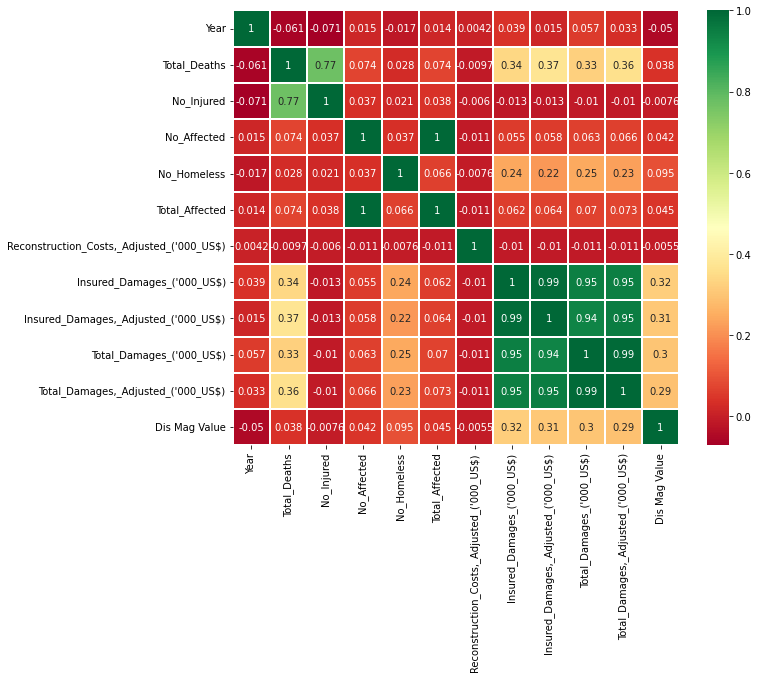

In [85]:
sns.heatmap(new_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()



Interpreting the Heatmap

First, observe that only numeric characteristics or int data type x variables are compared, as it is evident that alphabets and strings cannot be correlated. Before we can comprehend the plot, we must first define correlation.

If a rise in feature A causes an increase in feature B, then the two features are positively connected. A value 1 signifies 100% positive correlation.

If a rise in feature A leads to a reduction in feature B, then the two features are negatively linked. A value of -1 indicates an ideal negative correlation.

Let's assume that two characteristics are highly or perfectly connected, so that a rise in one causes an increase in the other. This indicates that both features include information that is quite comparable, with minimal or no differences. This is referred to as MultiColinearity since both variables contain almost identical information.

Do you believe that we should utilize both of them, even though one of them is redundant? While creating or training models, we should strive to eliminate duplicate features, as doing so decreases training time and provides several other benefits. However, if the data pertains to persons or the number of impacted individuals, such as Total fatalities, Number of injured, etc., it would be exempt. Even if they have a strong correlation, they might nevertheless provide significant insight for the investigation.

Now we can see from the preceding heatmap that some of the features are correlated. One association exists between Total Affected, No.Homeless, and No.Affected, which is the strongest having 1 correlation. Even if they have a strong correlation, we may still utilize them for analysis since they can provide us with information about a nation in the data set.




a7. Data Analysis

A. Determine the top 5 typhoons from 2000-2022 that brought the greatest number of casualties to the in America as a whole based from the Total Affected and Total Damages, Adjusted ('000 US$) x variables. 

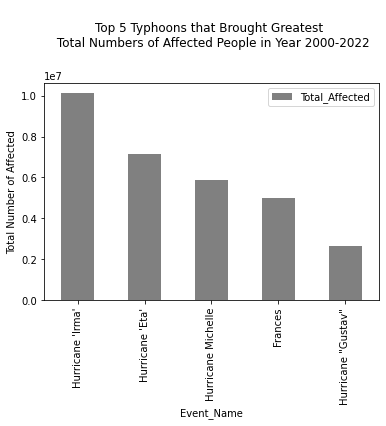

In [86]:
from IPython.display import display_html 

# Acquiring the top 5 typhoons from 2000-2022 that brought the greatest number of casualties in America as a whole based from the Total Affected.

TopTyphoonAffected = new_df.groupby('Event_Name')
TotalAff = TopTyphoonAffected['Total_Affected'].sum()
data_TotalAff = pd.DataFrame(TotalAff)
TotalAff_SortedData = data_TotalAff.sort_values(by='Total_Affected',ascending=False)
TotalAff_result = TotalAff_SortedData.head(5)
TotalAff_result

#graphing of data of top 5 typhoons from 2000-2022 that brought the greatest number of casualties in America as a whole based from the Total Affected.
TotalAff_result.plot(kind="bar",color="gray")
plt.xlabel("Event_Name")
plt.ylabel("Total Number of Affected")
plt.title("\nTop 5 Typhoons that Brought Greatest \n Total Numbers of Affected People in Year 2000-2022\n\n")
plt.show()
#Saving visualizations in TIFF file with 300 dpi
#plt.savefig('Top5TypNoAff.tiff', transparent=True, dpi=300)


In [87]:
#size of the bar graph

Irma = new_df.loc[new_df['Event_Name'] == "Hurricane 'Irma'"]
Irma = Irma.sort_values(by='Total_Affected',ascending=False)
Irma = Irma.head(10)
Irma = Irma.iloc[:,[5, 11 ]].copy()
display(Irma)


,Country,Total_Affected
526,Cuba,10000000
587,United States of America (the),70000
556,Haiti,40092
529,Anguilla,15000
527,Dominican Republic (the),6300
597,Sint Maarten (Dutch part),5040
530,Antigua and Barbuda,1800
561,Saint Kitts and Nevis,500
596,Saint Martin (French Part),110
531,Bahamas (the),0


In [88]:
# Acquiring the top 5 typhoons from 2000-2022 that brought the greatest number of casualties to the in America as a whole Total Damages, Adjusted ('000 US$)
TopTyphoonDamage = new_df.groupby('Event_Name')
TotalDam = TopTyphoonDamage["Total_Damages,_Adjusted_('000_US$)"].sum()
data_TotalDam = pd.DataFrame(TotalDam)
TotalDam_SortedData = data_TotalDam.sort_values(by="Total_Damages,_Adjusted_('000_US$)",ascending=False)
TotalDam_result = TotalDam_SortedData.head(5)
TotalDam_result


,"Total_Damages,_Adjusted_('000_US$)"
Event_Name,
Katrina,173439092
Hurricane Harvey,105018585
Hurricane 'Maria',77031684
Hurricane 'Irma',75295009
Tropical storm 'Ida',65100000


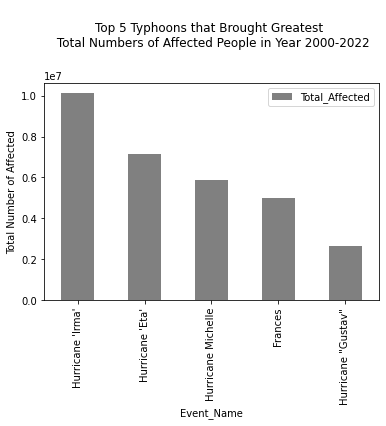

In [89]:
#graphing of data of Top 5 Typhoons that Brought Greatest Total Numbers of Affected People in Year 2000-2022
TotalAff_result.plot(kind="bar",color="gray")
plt.xlabel("Event_Name")
plt.ylabel("Total Number of Affected")
plt.title("\nTop 5 Typhoons that Brought Greatest \n Total Numbers of Affected People in Year 2000-2022\n\n")
plt.show()
#Saving visualizations in TIFF file with 300 dpi
#plt.savefig('Top5TypNoAff.tiff', transparent=True, dpi=300)


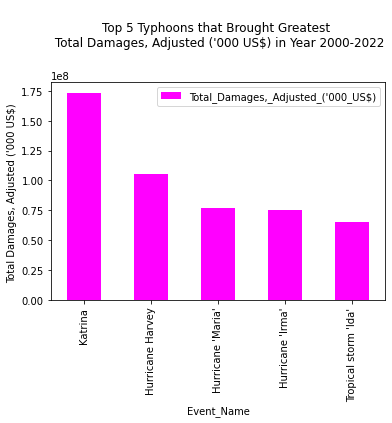

In [90]:
#graphing of data of Top 5 Typhoons that Brought Greatest Total Damages, Adjusted ('000 US$) in Year 2000-2022.
TotalDam_result.plot(kind="bar",color="magenta")
plt.xlabel("Event_Name")
plt.ylabel("Total Damages, Adjusted ('000 US$) ")
plt.title("\nTop 5 Typhoons that Brought Greatest \n Total Damages, Adjusted ('000 US$) in Year 2000-2022\n\n")
plt.show()

B. Get the data about the top 5 countries who had the greatest and least number of affected homeless from the typhoons on the year 2000-2022. 

C. Acquire the data about the top 5 countries who had the greatest number of deaths, injured, and affected individuals from the typhoons on the year 2000-2022. 

In [91]:
#Acquiring the top 5 countries with the highest number of total deaths caused by typhoons from 2000-2022 using groupby and sum function of pandas

ByCountryDeath = new_df.groupby('Country')
TotalData = ByCountryDeath['Total_Deaths'].sum()
data = pd.DataFrame(TotalData)
SortedData = data.sort_values(by='Total_Deaths',ascending=False)
result = SortedData.head(5)
display(result)

std = new_df['Total_Deaths'].std()
mean = new_df['Total_Deaths'].mean()

print("Standard Deviation of Total Deaths Columns is:", std)
print("Mean of Total Deaths Columns is:", mean)

,Total_Deaths
Country,
Haiti,4343
United States of America (the),2912
Guatemala,1896
Mexico,664
El Salvador,405


Standard Deviation of Total Deaths Columns is: 190.1603551272867
Mean of Total Deaths Columns is: 31.10362694300518


In [92]:
#Acquiring the top 5 countries with the highest number of total injured individuals caused by typhoons from 2000-2022 using groupby and sum function of pandas

ByCountryInjured = new_df.groupby('Country')
TotalData = ByCountryDeath['No_Injured'].sum()
data = pd.DataFrame(TotalData)
SortedData = data.sort_values(by='No_Injured',ascending=False)
result = SortedData.head(5)
display(result)


,No_Injured
Country,
Haiti,3393
Guatemala,581
Belize,570
Mexico,368
Dominica,150


,Total_Affected
Country,
Cuba,20202593
United States of America (the),11279675
Mexico,6176551
Honduras,5380420
Guatemala,3841847


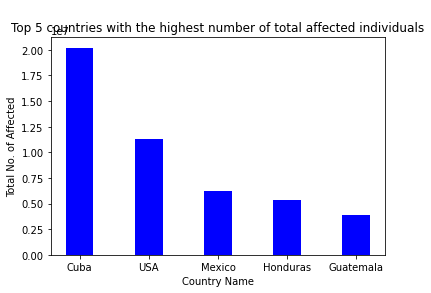

In [93]:
#Acquiring the top 5 countries with the highest number of total affected individuals caused by typhoons from 2000-2022 using groupby and sum function of pandas

ByCountry = new_df.groupby('Country')
TotalData = ByCountry['Total_Affected'].sum()
data = pd.DataFrame(TotalData)
SortedData = data.sort_values(by='Total_Affected',ascending=False)
result = SortedData.head(5)
display(result)

#graphing the Country and Total Affected
data = {'Cuba':20202593,'USA':11279675, 'Mexico':6176551, 'Honduras':5380420, 'Guatemala':3841847}
Country_name = list(data.keys())
Affected_values = list(data.values())

plt.bar(Country_name, Affected_values, color ='blue',
        width = 0.4)
 
plt.xlabel("Country Name")
plt.ylabel("Total No. of Affected")
plt.title("\nTop 5 countries with the highest number of total affected individuals")
plt.show()

D. Acquire the data about the name of countries who had the least number of deaths, injured, and affected individuals from the typhoons on 2000-2022.

In [94]:
#Acquiring the top 11 countries with the lowest number of total deaths caused by typhoons from 2000-2022 using groupby and sum function of pandas

ByCountryDeath = new_df.groupby('Country')
TotalData = ByCountryDeath['Total_Deaths'].sum()
data = pd.DataFrame(TotalData)
SortedData = data.sort_values(by='Total_Deaths',ascending=True)
result = SortedData.head(11)
display(result)


,Total_Deaths
Country,
Saint Kitts and Nevis,0
Antigua and Barbuda,1
Trinidad and Tobago,1
Barbados,2
Cayman Islands (the),2
Martinique,2
Canada,3
Anguilla,4
Turks and Caicos Islands (the),4


In [95]:
#Acquiring the top 19 countries with the lowest number of total injured individuals caused by typhoons from 2000-2022 using groupby and sum function of pandas

ByCountryInjured = new_df.groupby('Country')
TotalData = ByCountryDeath['No_Injured'].sum()
data = pd.DataFrame(TotalData)
SortedData = data.sort_values(by='No_Injured',ascending=True)
result = SortedData.head(20)
display(result)


,No_Injured
Country,
Anguilla,0
Turks and Caicos Islands (the),0
Trinidad and Tobago,0
Saint Lucia,0
Saint Kitts and Nevis,0
Saint Barthélemy,0
Puerto Rico,0
Panama,0
Nicaragua,0


In [96]:
#Acquiring the top 5 countries with the lowest number of total affected individuals caused by typhoons from 2000-2022 using groupby and sum function of pandas

ByCountry = new_df.groupby('Country')
TotalData = ByCountry['Total_Affected'].sum()
data = pd.DataFrame(TotalData)
SortedData = data.sort_values(by='Total_Affected',ascending=True)
result = SortedData.head(5)
display(result)


,Total_Affected
Country,
Virgin Island (U.S.),0
Bermuda,0
Saint Barthélemy,0
Virgin Island (British),0
Martinique,8


E. Get the information that shows the top 5 countries who were most affected in terms of economy (dollars) by typhoons from the year 2000-2022. 

,"Total_Damages,_Adjusted_('000_US$)"
Country,
United States of America (the),758704028
Puerto Rico,75979583
Mexico,34988807
Cuba,13638965
Bahamas (the),7117040


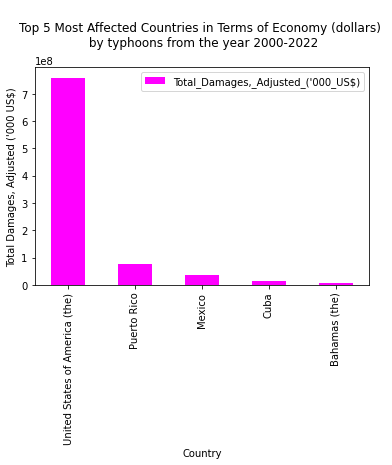

In [97]:
#sorting data for most affected in terms of economy
countrynames = new_df.groupby('Country')
totaldollars = countrynames["Total_Damages,_Adjusted_('000_US$)"].sum()
td_frame = pd.DataFrame(totaldollars)
SortedData_dollars = td_frame.sort_values(by="Total_Damages,_Adjusted_('000_US$)",ascending=False)
result_dollars = SortedData_dollars.head(5)
display(result_dollars)

#graphing of data
result_dollars.plot(kind="bar",color="magenta")
plt.xlabel("Country")
plt.ylabel("Total Damages, Adjusted ('000 US$)")
plt.title("\nTop 5 Most Affected Countries in Terms of Economy (dollars) \n by typhoons from the year 2000-2022\n")
plt.show()

F. Determine which top 5 typhoons are the strongest based from the x variable ‘Dis Mag Scale’ or the magnitude of the disaster at its epicenter with the values in kph (kilometer per Hour).

In [98]:
ByTyphoons = new_df.iloc[:,[4, 17]] 
data = pd.DataFrame(ByTyphoons)
SortedData = data.sort_values(by='Dis Mag Value',ascending=False)
result = SortedData.head(5)
display(result)




KeyError: 'Dis Mag Value'